<a href="https://colab.research.google.com/github/samyff12/LATAM/blob/main/IMF_BM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wbgapi
import wbgapi as wb  # api importe de datos del WB
import pandas as pd
import numpy as np

import urllib.request as urllib2
! pip install weo
import weo          # api WEO
from weo import WEO

In [ ]:
wb.source.info(27)   # global economic prospects 27 INFO

id,name,code,concepts,lastupdated
27,Global Economic Prospects,GEP,3,2022-01-11
,1 elements,,,


In [ ]:
# lista de paises de LATAM
latam = list(dict(wb.economy.coder(['Latin America and the Caribbean','Argentina', 'Peru', 'Chile', 'Dominican Republic',
                  'Panama','Colombia','El Salvador','Guatemala','Mexico','Nicaragua','Bolivia',
                  'Costa Rica','Brazil','Honduras','Paraguay','Ecuador','Uruguay']))
.values())

latam.append('LCN') # añadiendo AL y el Caribe

data = wb.data.DataFrame('NYGDPMKTPKDZ', latam , db=27).sort_values('2021',ascending=False)

#2021 - 19
data['21/19 BM'] = ((100*(1+data['2020']/100))*(1+data['2021']/100) - 100).round(1)

data.sort_values('21/19 BM',ascending=False)

,2019,2020,2021,2022,2023,21/19 BM
economy,,,,,,
GTM,3.9,-1.5,7.6,3.9,3.5,6.0
CHL,0.9,-5.8,11.8,2.2,1.8,5.3
PRY,-0.4,-0.8,4.3,4.0,3.9,3.5
NIC,-3.7,-2.0,5.5,3.0,2.5,3.4
DOM,5.1,-6.8,10.8,5.0,5.0,3.3
COL,3.3,-6.8,9.9,4.1,3.5,2.4
BRA,1.2,-3.9,4.9,1.4,2.7,0.8
CRI,2.3,-4.1,5.0,3.5,3.2,0.7
PER,2.2,-11.1,13.2,3.2,3.0,0.6


In [ ]:
año = str(input())
mes = str(np.where(input()=='a','Apr','Oct'))

# ultima publicacion
weo.all_releases()[-1]

2021
3


2021

In [ ]:
url = 'https://www.imf.org/-/media/Files/Publications/WEO/WEO-Database/' + año + '/WEO' + mes + año + 'all.ashx' # link

# descarga de archivo
urllib2.urlretrieve(url,'weo.csv')

('weo.csv', <http.client.HTTPMessage at 0x7f389e780850>)

In [ ]:
w = WEO('weo.csv') # extracción de base de datos (lectura de csv)

# obtencion crecimiento real desde 2019
dfweo = w.getc("NGDP_RPCH").loc['2019':,latam[1:-1]].T

# Comparativo prepandemia
dfweo['21/19 WEO'] = ((100*(1+dfweo['2020']/100))*(1+dfweo['2021']/100) - 100).round(1)
dfweo.sort_values('21/19 WEO',ascending=False)

,2019,2020,2021,2022,2023,2024,2025,2026,21/19 WEO
,,,,,,,,,
CHL,1.015,-5.845,10.999,2.471,1.878,1.990,2.273,2.490,4.5
PRY,-0.402,-0.566,4.500,3.800,4.000,3.500,3.500,3.500,3.9
GTM,3.867,-1.519,5.500,4.501,3.750,3.500,3.500,3.500,3.9
NIC,-3.674,-1.977,5.000,3.500,2.200,2.400,2.600,2.750,2.9
DOM,5.052,-6.720,9.521,5.502,5.027,4.986,4.974,4.950,2.2
BRA,1.411,-4.059,5.229,1.522,2.014,2.102,2.117,2.129,1.0
SLV,2.635,-7.944,9.025,3.540,2.340,2.245,2.045,1.800,0.4
COL,3.281,-6.796,7.608,3.834,3.256,3.410,3.445,3.500,0.3
CRI,2.256,-4.064,3.900,3.499,3.100,3.100,3.200,3.300,-0.3


In [ ]:
df = data[['2021','21/19 BM']]
df = df.merge(dfweo[dfweo.columns[[2,-1]]],how='inner',left_index=True,right_index=True).round(1)
#df

,2021,21/19 BM,2021,21/19 WEO
PER,13.2,0.6,10.0,-2.1
CHL,11.8,5.3,11.0,4.5
DOM,10.8,3.3,9.5,2.2
ARG,10.0,-0.9,7.5,-3.1
COL,9.9,2.4,7.6,0.3
PAN,9.9,-9.8,12.0,-8.1
SLV,8.0,-0.5,9.0,0.4
GTM,7.6,6.0,5.5,3.9
MEX,5.7,-3.0,6.2,-2.6
BOL,5.5,-3.8,5.0,-4.3


''

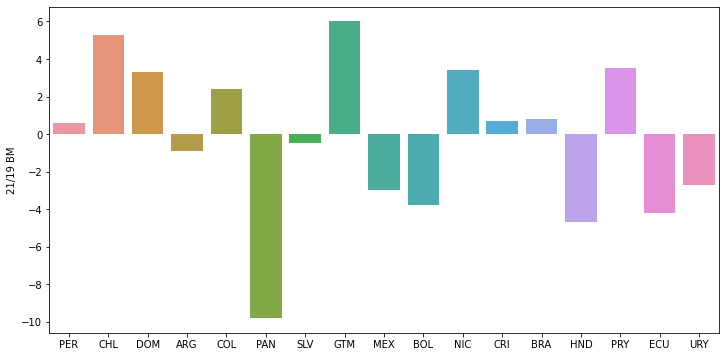

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df['21/19 BM'])
;

In [ ]:
df1 = df[['21/19 BM','21/19 WEO']].reset_index()
#df1 = df1.melt(id_vars = df1['index'], var_name = 'organismo', value_name='value')
df1 = pd.melt(df1,id_vars='index', var_name = 'organismo', value_name='value').sort_values('value')

''

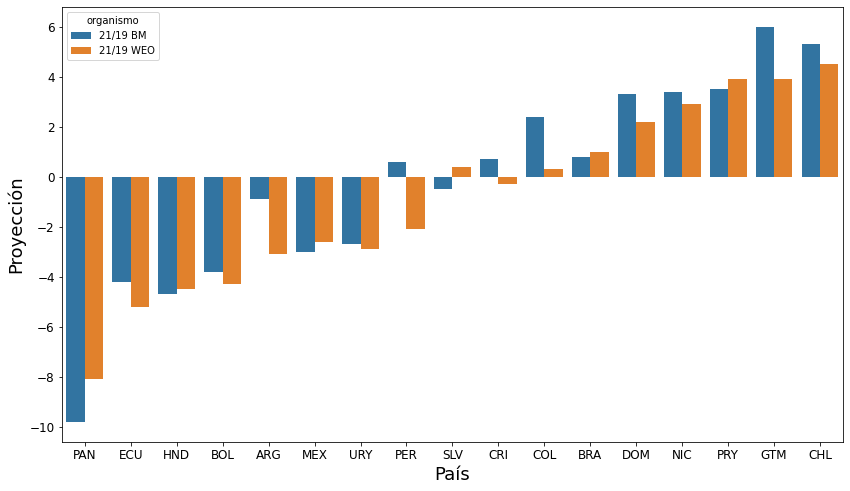

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=df1 ,x='index', y='value', hue='organismo')
plt.xlabel('País',fontsize=18)
plt.ylabel('Proyección',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
;

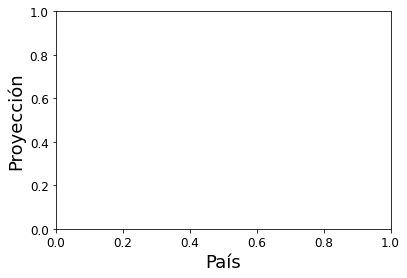

In [ ]:
import plotly.express as px
fig = px.bar(df1, x="index", y="value", text='value',
                 color="organismo", barmode="group", height=600,
                 title='Proyecciones FMI y BM prepandemia')

fig.show()